<a href="https://colab.research.google.com/github/SmritiBakshi2004/House_price_prediction.ipynb/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
data["mainroad"]=data["mainroad"].map({ "yes":1,"no":0})
data["mainroad"]
data
data["guestroom"]=data["guestroom"].map({ "yes":1,"no":0})
data["guestroom"]
data["basement"]=data["basement"].map({ "yes":1,"no":0})
data["basement"]
data["hotwaterheating"]=data["hotwaterheating"].map({ "yes":1,"no":0})
data["hotwaterheating"]
data["airconditioning"]=data["airconditioning"].map({ "yes":1,"no":0})
data["airconditioning"]
data["prefarea"]=data["prefarea"].map({ "yes":1,"no":0})
data["prefarea"]
data
data["furnishingstatus"]=data["furnishingstatus"].map({"furnished":1,"semi-furnished":2,"unfurnished":0})
data["furnishingstatus"]
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.linear_model import LinearRegression
y=data["price"]
y
data.drop(columns=["price"],inplace=True)
x=data
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,1
1,8960,4,4,4,1,0,0,0,1,3,0,1
2,9960,3,2,2,1,0,1,0,0,2,1,2
3,7500,4,2,2,1,0,1,0,1,3,1,1
4,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,2
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
LinearRegression()
y_pred=model.predict(x_test)
y_pred
y_test

,price
316,4060000
77,6650000
360,3710000
90,6440000
493,2800000
...,...
15,9100000
357,3773000
39,7910000
54,7350000


In [ ]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error(MSE)test:",mse)
y_train_pred=model.predict(x_train)
mse=mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error(MSE)train:",mse)
#R2 Score
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("Test R2 Score:",r2)
from sklearn.metrics import r2_score
train_r2=r2_score(y_train,y_train_pred)
print("Train R2 Score",train_r2)

Mean Squared Error(MSE)test: 1747758260816.2134
Mean Squared Error(MSE)train: 981079366470.0052
Test R2 Score: 0.6542221839581839
Train R2 Score 0.681818190392428


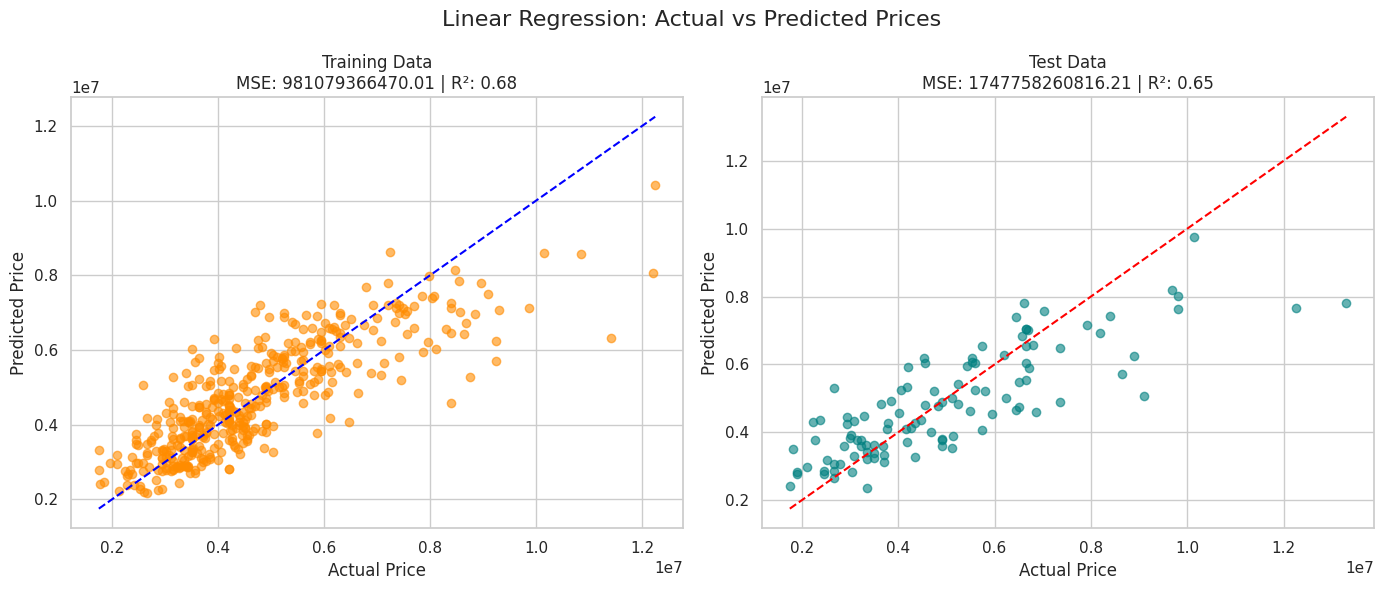

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Metrics
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Train Plot
axes[0].scatter(y_train, y_train_pred, alpha=0.6, color='darkorange')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'blue', linestyle='--')
axes[0].set_title(f"Training Data\nMSE: {mse_train:.2f} | R²: {r2_train:.2f}")
axes[0].set_xlabel("Actual Price")
axes[0].set_ylabel("Predicted Price")

# Test Plot
axes[1].scatter(y_test, y_test_pred, alpha=0.6, color='teal')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', linestyle='--')
axes[1].set_title(f"Test Data\nMSE: {mse_test:.2f} | R²: {r2_test:.2f}")
axes[1].set_xlabel("Actual Price")
axes[1].set_ylabel("Predicted Price")

# Final Layout
fig.suptitle("Linear Regression: Actual vs Predicted Prices", fontsize=16)
plt.tight_layout()
plt.show()
